In [1]:
%load_ext load_style
%load_style talk.css

# Read SST, Mask and Calculate global mean

In this notebook, we will carry out the following basic operations
* have a quick visualization of spatial data
* use mask array to mask out land
* calculate yearly climatology
* calculate global mean, simply.

## 1. Load basic libraries

In [2]:
%matplotlib inline
import numpy as np
         
from netCDF4 import Dataset # http://unidata.github.io/netcdf4-python/

import matplotlib.pyplot as plt         # to generate plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

## 2. Read skt data

### 2.1 Read data

In [3]:
ncfile = 'data\skt.mon.mean.nc'

fh  = Dataset(ncfile, mode='r') # file handle, open in read only mode
skt = fh.variables['skt'][:]
fh.close() # close the file

### 2.2 Have a dirty look of the first month

You can fine the skt cover both of land and ocean.

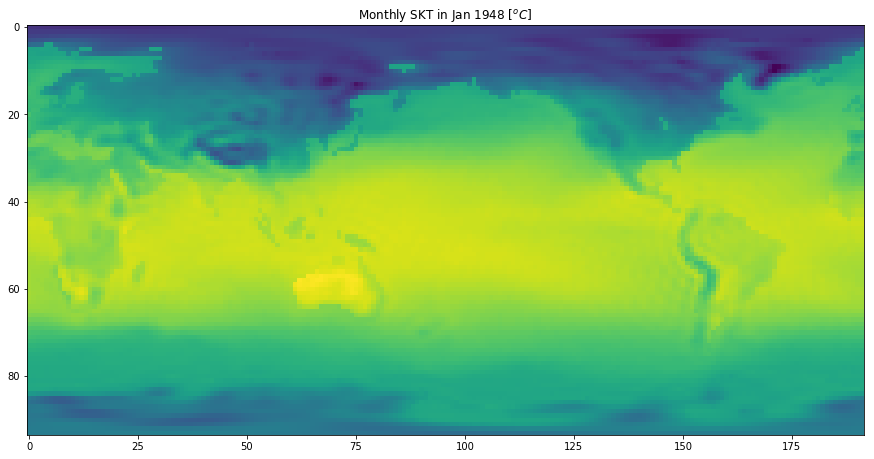

In [4]:
plt.imshow(skt[0])                        #data for the first time-step (January 1948)
plt.title('Monthly SKT in Jan 1948 [$^oC$]')

## 3. Read mask data

We hope only see skt over ocean. That is so-called (Sea Surface Temperature) SST. So have to mask the land part.

### 3.1  read data

In [5]:
lmfile = 'data\lsmask.19294.nc'
lmset  = Dataset(lmfile)
lsmask = lmset['lsmask'][0,:,:]# read land mask

### 3.2 Have a dirty look of the mask

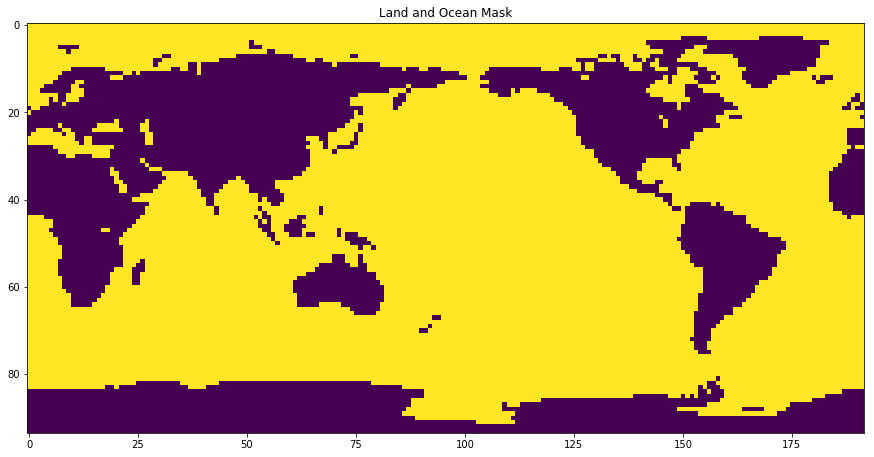

In [6]:
plt.imshow(lsmask)                        
plt.title('Land and Ocean Mask')

### 3.3 Set "1" on Ocean and "nan" on the land

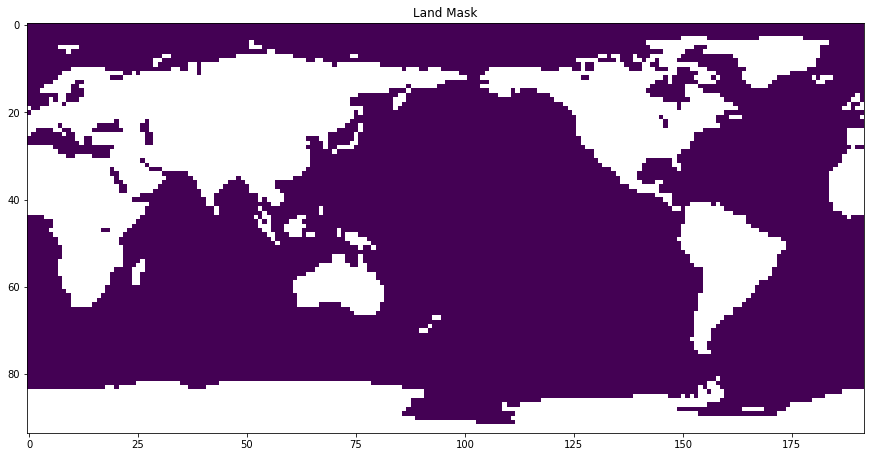

In [7]:
lsm = lsmask + 1
lsm[lsm<1.0] = np.nan

# now only ocean available
plt.imshow(lsm)                        
plt.title('Land Mask')

## 4. Calculate yearly climatology in the first year (1948)

* Get skt for the first year (i.e., 12 months)
* Calculate yearly mean
* Mask the yearly mean over ocean

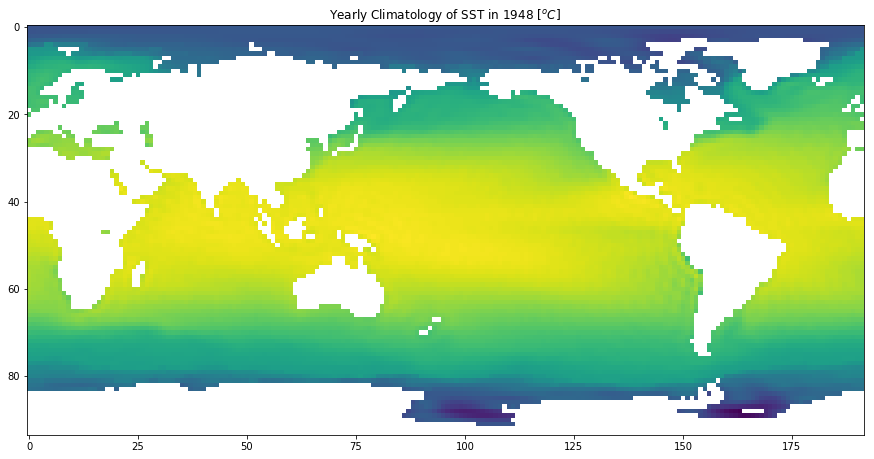

In [8]:
skt_y1 = np.mean(skt[0:12,:,:], axis=0)

# masking the land, leave ocean alone
sst_y1 = skt_y1*lsm

# dirty look
plt.imshow(sst_y1)                       
plt.title('Yearly Climatology of SST in 1948 [$^oC$]')

## 5. Simply calculate global mean

The following is the global averaged sst value. True only considering regular grid. **No weighting needed.**

In [9]:
sst_global = np.nanmean(sst_y1)
sst_global

10.126839

## References

http://unidata.github.io/netcdf4-python/

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Kalnay et al.,The NCEP/NCAR 40-year reanalysis project, Bull. Amer. Meteor. Soc., 77, 437-470, 1996.